<a target="_blank" href="https://colab.research.google.com/github/ginal001/ML-2024-2025/blob/main/Lab1/Homework01.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# **Homework Assignment: Principal Component Analysis (PCA) on 3D Clustered Data**

-------------------------------

You are provided with a dataset containing 3-dimensional data points from three distinct classes. The dataset can be downloaded from the following link:

**[PCA Three Clusters Dataset](https://github.com/SzymonNowakowski/Machine-Learning-2024/blob/master/PCA_three_clusters_data.csv)**

Each data point is represented by three continuous features $(x, y, z)$ and belongs to one of three clusters.

## **Primary Question**

**Perform PCA on the provided dataset to find the two principal components and visualize the data in a 2D plot using these components.**

- Compare this PCA plot with the following 2D plots of the original data:
  - $x$ vs. $y$
  - $x$ vs. $z$
  - $y$ vs. $z$

**Does PCA improve the separation of data points from different clusters compared to the original feature spaces? Explain why.**



## **Secondary Question**

Remember: before applying PCA, **standardize** the data so that each feature has a mean of 0 and a variance of 1.

**Why is standardization necessary before applying PCA?**

- Reflect on how differences in scale among features can impact the principal component directions.

## **Task & Deliverables**

1. **Colab Notebook**  
   - Create a **Colab notebook** that:
     - Performs PCA on the dataset and visualizes the first two principal components in a 2D scatter plot.
     - Includes separate 2D scatter plots for the original feature pairs: $(x, y)$, $(x, z)$, and $(y, z)$.
     - Clearly **answers** both the **primary** and **secondary** questions.
     - Uses Python code to perform PCA, standardize the data, and generate the required plots.
   - To answer the primary question, you may consider creating additional visualizations or charts beyond those listed above. For example, some students might choose to explore a 3D plot of the data. Feel free to experiment with different approaches.

2. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and include an **“Open in Colab”** badge in your notebook, so it can be launched directly from GitHub.

# Solution
Firstly, we are going to download the data.

In [2]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/SzymonNowakowski/Machine-Learning-2024/refs/heads/master/PCA_three_clusters_data.csv'
data = pd.read_csv(url)

Next, we are going to convert them to numpy data.

In [5]:
X = data.iloc[:, :3].to_numpy()
y = data.iloc[:, 3].to_numpy()
data

,x,y,z,class
0,0.647689,-0.138264,3.512299,0
1,-0.234137,-0.234153,10.769447,0
2,-0.469474,0.767435,11.166721,0
3,-0.465730,-0.463418,3.836479,0
4,-1.724918,-1.913280,1.710932,0
...,...,...,...,...
295,4.640708,0.583928,13.058193,2
296,5.820482,1.108704,4.176560,2
297,6.169296,1.066675,3.586969,2
298,4.832882,0.648710,9.773340,2


Now, we are going to plot each of pair of variables on scatter plot.

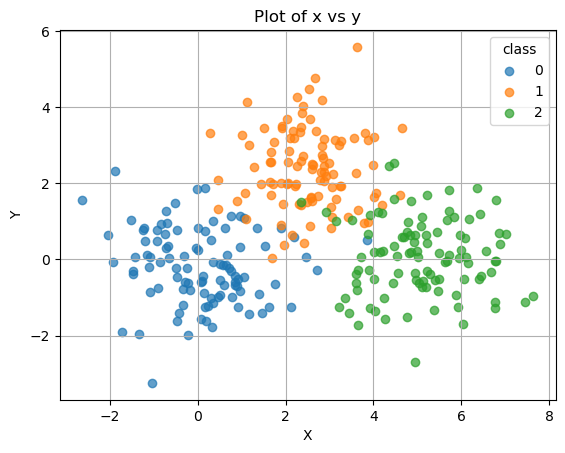

In [8]:
import matplotlib.pyplot as plt

for i in range(0, 3): #todo
    plt.scatter(X[y == i, 0], X[y == i, 1], label=i, alpha=0.7)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Plot of x vs y")
plt.legend(title="class")
plt.grid(True)
plt.show()

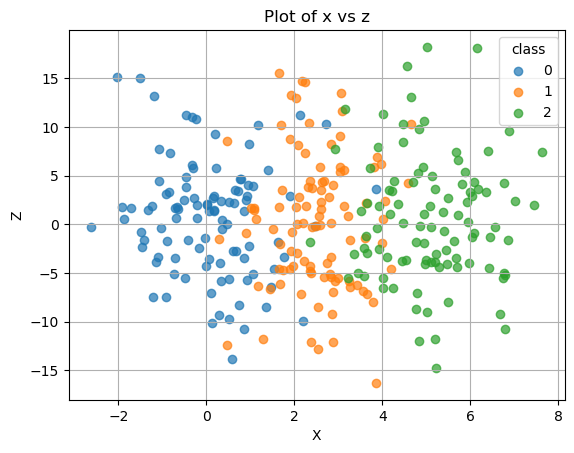

In [10]:
for i in range(0, 3):
    plt.scatter(X[y == i, 0], X[y == i, 2], label=i, alpha=0.7)

plt.xlabel("X")
plt.ylabel("Z")
plt.title("Plot of x vs z")
plt.legend(title="class")
plt.grid(True)
plt.show()

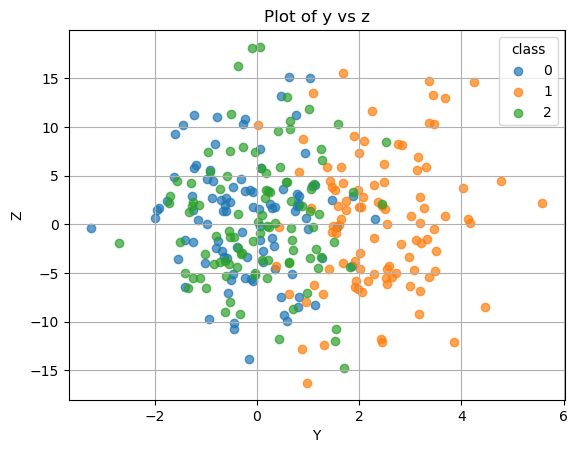

In [12]:
for i in range(0, 3):
    plt.scatter(X[y == i, 1], X[y == i, 2], label=i, alpha=0.7)

plt.xlabel("Y")
plt.ylabel("Z")
plt.title("Plot of y vs z")
plt.legend(title="class")
plt.grid(True)
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Center and standardize the data before applying PCA
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Perform PCA and reduce the data to 2 components for visualization
pca = PCA(n_components = 2)
XV = pca.fit_transform(X)

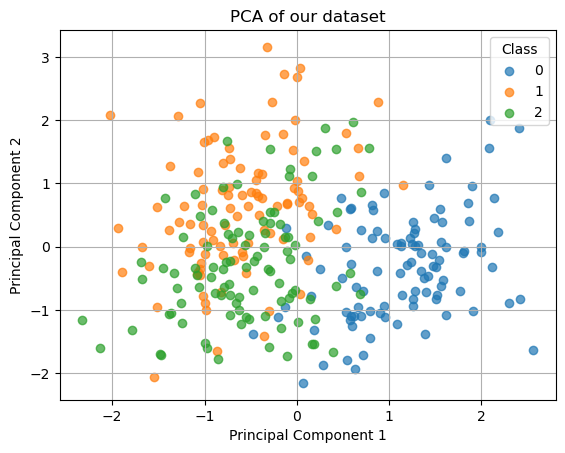

In [16]:
for i in range(0,3):
    plt.scatter(XV[y==i, 0], XV[y==i, 1], label=i, alpha=0.7)


plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of our dataset")
plt.legend(title="Class")
plt.grid(True)
plt.show()

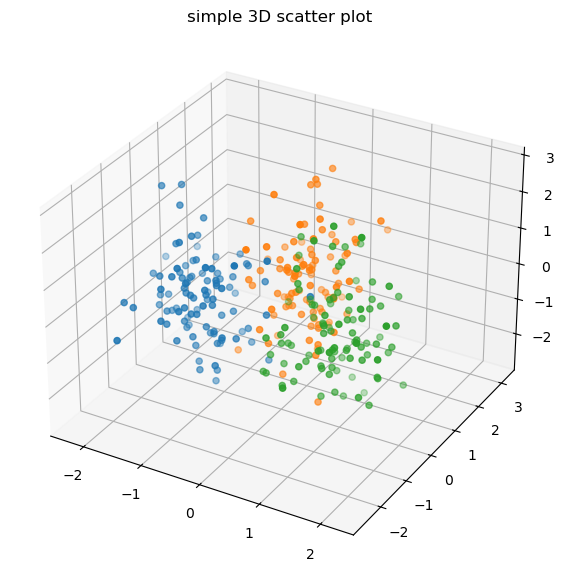

In [61]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot #todo
ax.scatter3D(X[y == 0,0], X[y == 0,1], X[y == 0,2])
ax.scatter3D(X[y == 1,0], X[y == 1,1], X[y == 1,2])
ax.scatter3D(X[y == 2,0], X[y == 2,1], X[y == 2,2])
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()